### Starcraft Project 로 class 복습하기

In [22]:
from random import *    # 난수로 랜덤 데미지를 입는다고 가정하기 위해.




# 일반 지상 유닛
class Unit:
    def __init__(self, name, hp, speed):
        self.name = name
        self.hp = hp
        self.speed = speed  
        print("{0} 유닛이 생성되었습니다.".format(name))
        
    def move(self, location):
        print("{0} : {1} 방향으로 이동합니다. [속도 {2}]"\
             .format(self.name, location, self.speed))
        
    def damaged(self, damage):  
        print("{0} : {1} 데미지를 입었습니다.".format(self.name, damage))
        self.hp -= damage
        print("{0} : 현재 체력은 {1} 입니다.".format(self.name, self.hp))
        if self.hp <= 0:
            print("{0} : 파괴되었습니다.".format(self.name))

        
# 공격 유닛
class AttackUnit(Unit):
    def __init__(self, name, hp, speed, damage): 
        Unit.__init__(self, name, hp, speed)
        self.damage = damage   
    def attack(self, location): 
        print("{0} : {1} 방향으로 적군을 공격 합니다. [공격력 {2}]"\
              .format(self.name, location, self.damage))        

        
### 새로운 클래스 만들기~

# 마린
class Marine(AttackUnit):
    def __init__(self):
        AttackUnit.__init__(self, "마린", 40, 1, 5)

    # 스팀팩 : 일정 시간 동안 이동 및 공격 속도를 증가, 자기 체력 10 감소   
    def stimpack(self):
        if self.hp > 10:
            self.hp -= 10
            print("{0} : 스팀팩을 사용합니다. (HP 10 감소)".format(self.name))
        else:
            print("{0} : 체력이 부족하여 스팀팩을 사용하지 않습니다.".format(self.name))
        
# 탱크
class Tank(AttackUnit):
    # 시즈모드 : 탱크를 지상에 고정시켜, 더 높은 파워로 공격 가능. 이동 불가.
    seize_developed = False  # 시즈모드 개발여부
    
    def __init__(self):
        AttackUnit.__init__(self, "탱크", 150, 1, 35)
        self.seize_mode = False
        
    def set_seize_mode(self):
        if Tank.seize_developed == False:
            return
        
        # 현재 시즈모드가 아닐 때 -> 시즈모드
        if self.seize_mode == False:
            print("{0} : 시즈모드로 전환합니다.".format(self.name))
            self.damage *= 2
            self.seize_mode = True
        # 현재 시즈모드일 때 -> 시즈모드 해제
        else:
            print("{0} : 시즈모드를 해제하니다.".format(self.name))
            self.damage /= 2
            self.seize_mode = False
        
        
            
# 날 수 있는 기능을 가진 클래스
class Flyable:
    def __init__(self, flying_speed):
        self.flying_speed = flying_speed        
    def fly(self, name, location):
        print("{0} : {1} 방향으로 날아갑니다. [속도 {2}]"\
              .format(name, location, self.flying_speed))

# 공중 공격 유닛 클래스        
class FlyableAttackUnit(AttackUnit, Flyable):
    def __init__(self, name, hp, damage, flying_speed):
        AttackUnit.__init__(self, name, hp, 0, damage)   # 지상 speed 0
        Flyable.__init__(self, flying_speed)          
    def move(self, location):
        self.fly(self.name, location)


        
        
# 레이스
class Wraith(FlyableAttackUnit):
    def __init__(self):
        FlyableAttackUnit.__init__(self, "레이스", 80, 20, 5)
        self.clocked = False  # 클로킹 모드 (해제 상태)
        
    def clocking(self):
        if self.clocked == True:  # 클로킹 모드 -> 모드 해제
            priint("{0} : 클로킹 모드 해제합니다.".format(self.name))
            self.clocked = False
        else:  # 클로킹 모드 해제 -> 모드 설정
            print("{0} : 클로킹 모드 설정합니다.".format(self.name))
            self.clocked = True

### 실제 게임을 해볼까요~~~??

In [23]:
def game_start():
    print("[알림] 새로운 게임을 시작합니다.")
    
def game_over():
    print("Player : gg")  # good game
    print("[Player] 님이 게임에서 퇴장하셨습니다.")

In [24]:
# 실제 게임 진행
game_start()

# 마린 3기 생성
m1 = Marine()
m2 = Marine()
m3 = Marine()

# 탱크 2기 생성
t1 = Tank()
t2 = Tank()

# 레이스 1기 생성
w1 = Wraith()

# 유닛 일괄 관리 (생성된 모든 유닛 append)
attack_units = []
attack_units.append(m1)
attack_units.append(m2)
attack_units.append(m3)
attack_units.append(t1)
attack_units.append(t2)
attack_units.append(w1)

# 전군 이동
for unit in attack_units:
    unit.move("1시")
    
# 탱크 시즈모드 개발
Tank.seize_developed = True
print("[알림] 탱크 시즈 모드 개발이 완료되었습니다.")

# 공격 모드 준비 (마린 : 스팀팩, 탱크 : 시즈모드, 레이스 : 클로킹)
for unit in attack_units:
    if isinstance(unit, Marine):
        unit.stimpack()
    elif isinstance(unit, Tank):
        unit.set_seize_mode()
    elif isinstance(unit, Wraith):
        unit.clocking()
        
# 전군 공격
for unit in attack_units:
    unit.attack("1시")
    
# 전군 피해
for unit in attack_units:
    unit.damaged(randint(5, 21))  # 공격은 랜덤으로 받음 (5 ~ 20)
    
# 게임 종료
game_over()

[알림] 새로운 게임을 시작합니다.
마린 유닛이 생성되었습니다.
마린 유닛이 생성되었습니다.
마린 유닛이 생성되었습니다.
탱크 유닛이 생성되었습니다.
탱크 유닛이 생성되었습니다.
레이스 유닛이 생성되었습니다.
마린 : 1시 방향으로 이동합니다. [속도 1]
마린 : 1시 방향으로 이동합니다. [속도 1]
마린 : 1시 방향으로 이동합니다. [속도 1]
탱크 : 1시 방향으로 이동합니다. [속도 1]
탱크 : 1시 방향으로 이동합니다. [속도 1]
레이스 : 1시 방향으로 날아갑니다. [속도 5]
[알림] 탱크 시즈 모드 개발이 완료되었습니다.
마린 : 스팀팩을 사용합니다. (HP 10 감소)
마린 : 스팀팩을 사용합니다. (HP 10 감소)
마린 : 스팀팩을 사용합니다. (HP 10 감소)
탱크 : 시즈모드로 전환합니다.
탱크 : 시즈모드로 전환합니다.
레이스 : 클로킹 모드 설정합니다.
마린 : 1시 방향으로 적군을 공격 합니다. [공격력 5]
마린 : 1시 방향으로 적군을 공격 합니다. [공격력 5]
마린 : 1시 방향으로 적군을 공격 합니다. [공격력 5]
탱크 : 1시 방향으로 적군을 공격 합니다. [공격력 70]
탱크 : 1시 방향으로 적군을 공격 합니다. [공격력 70]
레이스 : 1시 방향으로 적군을 공격 합니다. [공격력 20]
마린 : 18 데미지를 입었습니다.
마린 : 현재 체력은 12 입니다.
마린 : 13 데미지를 입었습니다.
마린 : 현재 체력은 17 입니다.
마린 : 17 데미지를 입었습니다.
마린 : 현재 체력은 13 입니다.
탱크 : 14 데미지를 입었습니다.
탱크 : 현재 체력은 136 입니다.
탱크 : 13 데미지를 입었습니다.
탱크 : 현재 체력은 137 입니다.
레이스 : 18 데미지를 입었습니다.
레이스 : 현재 체력은 62 입니다.
Player : gg
[Player] 님이 게임에서 퇴장하셨습니다.


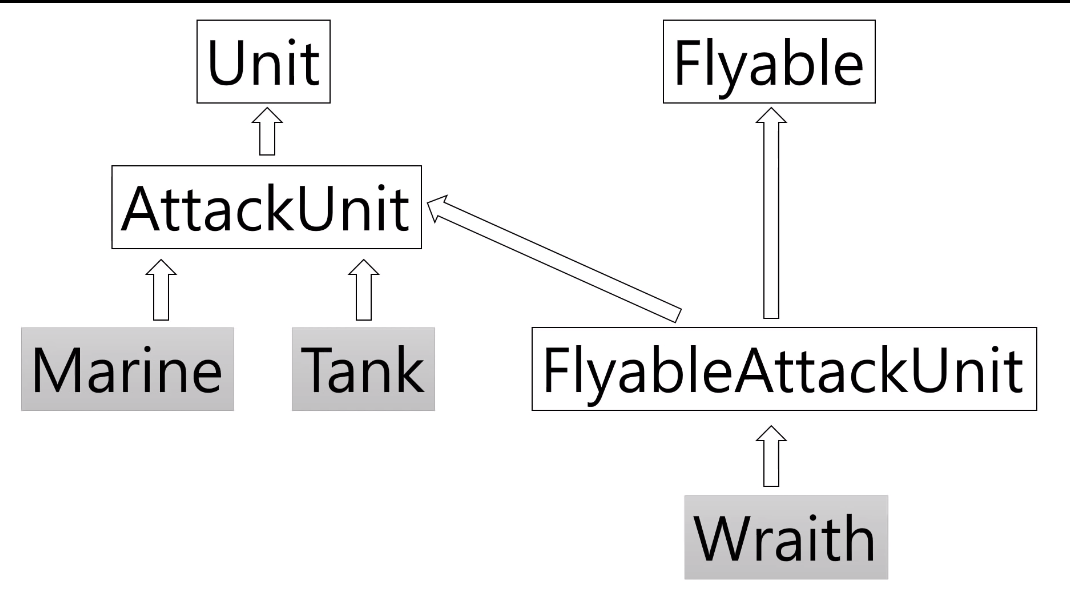